# ワクチンのefficacyのClopper-Pearsonの信頼区間

* 黒木玄
* 2022-10-14
$
\newcommand\op{\operatorname}
\newcommand\IRR{\op{IRR}}
\newcommand\IRRhat{\widehat{\IRR}}
\newcommand\VE{\op{VE}}
\newcommand\VEhat{\widehat{\VE}}
\newcommand\quantile{\op{quantile}}
\newcommand\cdf{\op{cdf}}
\newcommand\ccdf{\op{ccdf}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
$

__データ:__ $c_1, T_1, c_0, T_0$.  ここで

* $c_0$ はワクチン群の人達での総感染数
* $T_0$ はワクチン群の人達の総人年
* $c_1$ はプラセボ群の人達での総感染数
* $T_1$ はプラセボ分の人達の総人年

$\IRR$ (incidence rate ratio, 単位時間で感染する人数の期待値の比)の点推定値:

$$
\IRRhat = \frac{c_0/T_0}{c_1/T_1}.
$$

$\VE$ (vaccine efficacy)の点推定値:

$$
\VEhat = 1 - \IRRhat.
$$

__統計モデル:__ ワクチン群とプラセボ群において単位時間あたり平均してそれぞれ $\lambda_1, \lambda_0$ 人の感染がPoisson分布に従って独立にかつランダムに発生するというモデルを考える. 

このモデル内において, ワクチン群とプラセボ群での総感染数 $C_1, C_0$ はそれぞれ $\op{Poisson}(T_1\lambda_1)$, $\op{Poisson}(T_0\lambda_0)$ 独立に従う:

$$
C_1\sim \op{Poisson}(T_1\lambda_1), \quad
C_0\sim \op{Poisson}(T_0\lambda_0).
$$

このモデルにおける $\IRR$ (incidence rate ratio, 単位時間で感染する人数の期待値の比)と$\VE$ (vaccine efficacy)が次のように定義される:

$$
\IRR = \frac{\lambda_1}{\lambda_0}, \quad
\VE = 1 - \IRR = 1.
$$

以下において, 総人年の比を $r$ と書くことにする:

$$
r = \frac{T_1}{T_0}.
$$

__条件付き確率分布:__ 上の統計モデル内での $(C_1, C_0)$ の同時確率分布を条件 $C_1 + C_0$ の値がデータの数値 $c_1 + c_0$ に等しくなるという条件で制限して得られる条件付き確率分布において, $C_1$ は二項分布 $\op{Binomial}(c_1 + c_0, \pi)$ に従う. ここで,

$$
\pi = \frac{T_1\lambda_1}{T_1\lambda_1 + T_0\lambda_0} = \frac{r\IRR}{r\IRR+1}.
$$

2つ目の等号で分子分母を $T_0\lambda_0$ で割った.  さらに, 次が成立することに注意せよ:

$$
\IRR = \frac{\pi}{r(1-\pi)}, \quad
\VE = 1 - \frac{\pi}{r(1-\pi)}.
$$

上の条件付き確率分布を使って, $\pi$ に関するP値と信頼区間を二項検定の方法で定義できるので, そのことから $\IRR$ と $\VE$ に関するP値と信頼区間の定義も自然に得られる.  $\pi$ に関するP値と信頼区間の定義ごとに, $\IRR$ と $\VE$ に関するP値と信頼区間の定義が得られる.

以下において, $0\le\alpha\le 1$ と仮定する. $\alpha$ は有意水準と呼ばれ, $1-\alpha$ は信頼度(信頼水準)と呼ばれる.

__Clopper-PearsonのP値函数:__ $\pi$ に関するClopper-PearsonのP値函数が次のように定義される:

$$
\pvalue(c_1, c_0|\pi) =
\min\begin{pmatrix}
1 \\
2\cdf(\op{Binomial}(c_1+c_0, \pi), c_1) \\
2\ccdf(\op{Binomial}(c_1+c_0, \pi), c_1-1) \\
\end{pmatrix}.
$$

ここで, $\cdf(D, x)$ は分布 $D$ の累積分布函数を表すとし, $\ccdf(D, x) = 1 - \cdf(D, x)$ とおいた.

このように定義されたP値については次の保守性(conservativity)が成立している:

* ${T_1\lambda_1}/({T_1\lambda_1 + T_0\lambda_0})$ の値が $\pi$ に等しいという条件の下での統計モデル内でこのP値が $\alpha$ 以下になる確率は $\alpha$ 以下になる.

この性質はSterneのP値函数についても成立している.

二項分布モデルについてはClopper-Pearsonの方法やSterneの方法以外にもP値函数の定義の仕方が沢山ある.  例えば, それらのmid-P版, Wilsonの方法(スコア検定の方法), Waldの方法, Bayesianの方法などがある.  ただし, Wilsonの方法, Waldの方法, Bayesianの方法では上の保守性の条件は成立しない.  (その代わりに得られるメリットもある.)

条件付き確率分布として出て来る二項分布モデルの場合に帰着する方法は, 2×2の分割表の独立性に関するFisher検定の方法の類似になっている.  このように条件付き確率分布に帰着して得られる検定法を条件付き検定(conditional test)と呼ぶことがある.  

条件付き検定の方法を使わずにP値を定義することもできる.

このようにP値の定義の仕方は沢山あり, それぞれ異なる利点と欠点を持っている.

以上で挙げた方法の中でClopper-Pearsonの方法で構成されたP値は大まかな傾向として最も大きくなりやすいという性質を持っている.  すなわち, Clopper-PearsonのP値函数(および信頼区間)は保守的な傾向を持っている.  その保守的な傾向は標本サイズが大きくなると薄れる.

__Clopper-Pearsonの信頼区間:__ 上のP値函数を使って, $\pi$ に関するClopper-Pearsonの信頼区間が次のように定義される:

$$
\confint(c_1, c_0|\alpha) = 
\{\,\pi\in[0,1]\mid \pvalue(c_1, c_0|\pi) \ge \alpha\,\}.
$$

一般にP値函数が与えられればこの方法によって信頼区間も自動的に定義される.

__Clopper-Pearsonの信頼区間のベータ分布表示:__ 二項分布とベータ分布の関係式

$$
\begin{aligned}
&
\cdf(\op{Binomial}(n, p), k) = \ccdf(\op{Beta}(k+1, n-k), p),
\\ &
\ccdf(\op{Binomial}(n, p), k-1) = \cdf(\op{Beta}(k, n-k+1), p)
\end{aligned}
$$

より,

$$
\pvalue(c_1, c_0|\pi) =
\min\begin{pmatrix}
1 \\
2\ccdf(\op{Beta}(c_1+1, c_0), \pi) \\
2\cdf(\op{Beta}(c_1, c_0+1), \pi) \\
\end{pmatrix}
$$

となることを使うと, 次が成立することがわかる:

$$
\confint(c_1, c_0|\alpha) =
[\quantile(\op{Beta}(c_1, c_0+1), \alpha/2), \quantile(\op{Beta}(c_1+1, c_0), 1-\alpha/2)].
$$

ここで $\quantile(D, p)$ は分布 $D$ の分位点函数(累積分布函数の逆函数)を表す.

__IRRとVEに関するClopper-Pearsonの信頼区間:__ $[L_\pi, U_\pi] = \confint(c_1, c_0|\alpha)$ とおく:

$$
\begin{aligned}
&
L_\pi = \quantile(\op{Beta}(c_1, c_0+1), \alpha/2),
\\ &
U_\pi = \quantile(\op{Beta}(c_1+1, c_0), 1-\alpha/2).
\end{aligned}
$$

このとき $\IRR$ と $\VE$ に関するClopper-Pearsonの信頼区間は以下のように表される:

$\IRR$ に関するClopper-Pearsonの信頼区間:

$$
\left[
\frac{L_\pi}{r(1 - L_\pi)},
\frac{U_\pi}{r(1 - U_\pi)}
\right].
$$

$\VE$ に関するClopper-Pearsonの信頼区間:

$$
\left[
1 - \frac{U_\pi}{r(1 - U_\pi)},
1 - \frac{L_\pi}{r(1 - L_\pi)}
\right].
$$

__参照文献:__

* Qinyu Wei, Peng Wang and Ping Yin. Confidence interval estimation for vaccine efficacy against COVID-19. Front. Public Health, 12 August 2022, Sec. Infectious Diseases – Surveillance, Prevention and Treatment. https://doi.org/10.3389/fpubh.2022.848120
* C4591001 Clinical Trial Group. Safety and Efficacy of the BNT162b2 mRNA Covid-19 Vaccine. December 31, 2020
N Engl J Med 2020; 383:2603-2615. https://doi.org/10.1056/NEJMoa2034577

In [1]:
using Distributions
using Printf

function efficacyhat(c1, T1, c0, T0)
    1 - (c1/T1)/(c0/T0)
end

function confint_efficacy_clopper_pearson(c1, T1, c0, T0; α=0.05)
    Lπ = c1 == 0 ? 0.0 : quantile(Beta(c1, c0+1), α/2)
    Uπ = c0 == 0 ? 1.0 : quantile(Beta(c1+1, c0), 1-α/2)
    r = T1/T0
    [1 - Uπ/(r*(1-Uπ)), 1 - Lπ/(r*(1-Lπ))]
end

# Table 3 of https://doi.org/10.1056/NEJMoa2034577
data = Any[
    8 2.214 17411 162 2.222 17511  95.0  90.0  97.9
    5 1.234  9897 114 1.239  9955  95.6  89.4  98.6
    3 0.980  7500  48 0.983  7543  93.7  80.6  98.8
    1 0.508  3848  19 0.511  3880  94.7  66.7  99.9
    0 0.102   774   5 0.106   785 100.0 −13.1 100.0
    3 1.124  8875  81 1.108  8762  96.4  88.9  99.3
    5 1.090  8536  81 1.114  8749  93.7  84.7  98.0
    7 1.889 14504 146 1.903 14670  95.2  89.8  98.1
    0 0.165  1502   7 0.164  1486 100.0  31.2 100.0
    1 0.160  1405   9 0.155  1355  89.3  22.6  99.8
    3 0.605  4764  53 0.600  4746  94.4  82.7  98.9
    5 1.596 12548 109 1.608 12661  95.4  88.9  98.5
    1 0.351  2545  35 0.346  2521  97.2  83.3  99.9
    1 0.119  1129   8 0.117  1121  87.7   8.1  99.7
    6 1.732 13359 119 1.747 13506  94.9  88.6  98.2
]

for i in axes(data, 1)
    c1, T1, n1, c0, T0, n0, ve, ci_L, ci_U = data[i, :]
    VE = efficacyhat(c1, T1, c0, T0)
    CI = confint_efficacy_clopper_pearson(c1, T1, c0, T0)
    @printf("%5d  %5.3f (%5d)  %5d  %5.3f (%5d)  %5.1f (%5.1f -- %5.1f)  %5.1f (%5.1f -- %5.1f)  %5.1f (%5.1f -- %5.1f)\n",
        c1, T1, n1, c0, T0, n0, ve, ci_L, ci_U, 100VE, 100CI[begin], 100CI[end],
        100VE-ve, 100CI[begin]-ci_L, 100CI[end]-ci_U)
end

    8  2.214 (17411)    162  2.222 (17511)   95.0 ( 90.0 --  97.9)   95.0 ( 90.0 --  97.9)    0.0 ( -0.0 --  -0.0)
    5  1.234 ( 9897)    114  1.239 ( 9955)   95.6 ( 89.4 --  98.6)   95.6 ( 89.4 --  98.6)   -0.0 (  0.0 --  -0.0)
    3  0.980 ( 7500)     48  0.983 ( 7543)   93.7 ( 80.6 --  98.8)   93.7 ( 80.5 --  98.8)    0.0 ( -0.1 --  -0.0)
    1  0.508 ( 3848)     19  0.511 ( 3880)   94.7 ( 66.7 --  99.9)   94.7 ( 66.7 --  99.9)    0.0 ( -0.0 --  -0.0)
    0  0.102 (  774)      5  0.106 (  785)  100.0 (-13.1 -- 100.0)  100.0 (-13.4 -- 100.0)    0.0 ( -0.3 --   0.0)
    3  1.124 ( 8875)     81  1.108 ( 8762)   96.4 ( 88.9 --  99.3)   96.3 ( 88.9 --  99.3)   -0.1 (  0.0 --  -0.0)
    5  1.090 ( 8536)     81  1.114 ( 8749)   93.7 ( 84.7 --  98.0)   93.7 ( 84.7 --  98.0)   -0.0 ( -0.0 --   0.0)
    7  1.889 (14504)    146  1.903 (14670)   95.2 ( 89.8 --  98.1)   95.2 ( 89.8 --  98.1)   -0.0 ( -0.0 --  -0.0)
    0  0.165 ( 1502)      7  0.164 ( 1486)  100.0 ( 31.2 -- 100.0)  100.0 ( 31.0

微小に数値が一致しないのはなぜか?

Table 3 of https://www.nejm.org/doi/10.1056/NEJMoa2034577

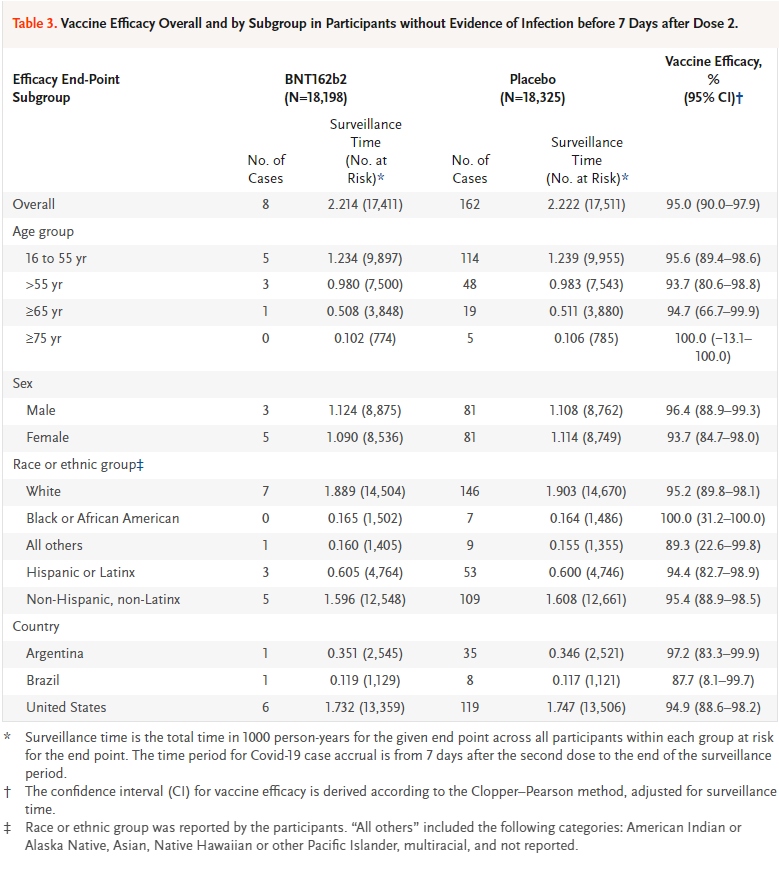